# **Carga de cartografías en Python**
En este cuaderno vamos a ver como cargar cartografías y hacer representaciones simples de las variables sobre mapas. Antes de comenzar es conveninte, aunque no estrictamente necesario, crear un nuevo entorno para instalar las librerías espaciales con sus dependencias

In [182]:
# Podemos Crear un nuevo entorno de trabajo (mejor desde el terminal)
#! conda create -n geo_env
#! conda activate geo_env
#! conda config --env --add channels conda-forge
#! conda config --env --set channel_priority strict

# conda install --channel conda-forge geopandas

**Bibliografía recomendada**: La referencia básica para trabajar con datos espaciales con python es [Geographic Data Science with Python](https://geographicdata.science/book/intro.html)

Las principales librerías para trabajar con cartografías y datos espaciales son:
- `geopandas` para trabajar con datos espaciales. Trabaja con GeoDataFrame o geotablas, que es un dataframe donde cada fila corresponde a una figura geométrica, cada columna es un metadato y con una columna final con la geometría, puntos (x,y) que hay que unir para definir cada figura espacial (sigue la estructura de "simple features" utilizada también en `PostGis` de `Postgres` o `sf` de R)   
- `xarray` para datos espaciales raster, que representan superficies mediante cuadrículas. Trabaja con objetos DataArrays donde cada elemento tiene una coordenada (x,y) que correpnde a una celda. Yo en esta clase no trabajaré con estos datos raster. Para más información de como trabajar con datos raster, y lo más importante, de como poder convertirlos en datos tabulares tipo GeoDataFrame para poder aplicar todas las librerías de sci-kit.learn (por ejemplo) para hacer machine learning véase [Geographic Data Science with Python](https://geographicdata.science/book/intro.html)

<br>

- Para hacer el análisis estadístico espacial utilizaremos la librería **`PySal`** (sobre esta metalibrería está construido, por ejemplo [Qgis](https://www.qgis.org/)). Sobre esta librería hablaremos un poco más adelante, pero si alguien está interesado puede consultar [pysal.org](https://pysal.org/)
- para gestionar cartografías, fusionar unir, crear zonas, etc puede utilizarse  la librería **`Shapely`**. Yo no voy a ver nada de esta librería, pero animo a toda persona interesada a consultar el manual de referencia de esta librería [Shapely](https://shapely.readthedocs.io/en/stable/index.html)


## **Trabajando con Geopandas** 

La librería `geopandas` permite trabajar con cartografías (con mapas) utilizando la arquitectura de los data frames de `pandas`. Para una introducción a esta librería `geopandas` es muy recomendable visitar su web [GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html). 

Importamos Geopandas y otras librerías que también utilizaremos

In [183]:
import geopandas as gpd

import pandas as pd
import matplotlib.pyplot as plt

`GeoPandas` extiende la librería `Pandas` para que pueda trabajar con datos espaciales. La estructura de datos principal en `GeoPandas` es `geopandas.GeoDataFrame`, una subclase de `pandas.DataFrame`, que puede almacenar **columnas con la geometría** de cada objeto espacial (almacenado como una fila del dataframe) y realizar operaciones espaciales.

Esa columna con las geometrías es una `geopandas.GeoSeries`, una subclase de `pandas.Series`, que almacena las geometrías, esto es los puntos en el espacio que conforman de cada objeto espacial (ya sea un punto, una linea o un polígono espacial).   

Por lo tanto, un `GeoDataFrame` es una combinación de `pandas.Series`, con datos tradicionales (numéricos, booleanos, texto, etc.), y `geopandas.GeoSeries`, con geometrías (puntos, polígonos, etc.).    

Cada `GeoSeries` contiene una geometría y tiene el atributo `GeoSeries.crs`, la cual almacena información sobre la proyección utilizada en la geometría (CRS son las siglas en inglés de **Coordinate Reference System**)

## Lectura de Ficheros de Cartografías

Los mapas, las cartografías, hay que cargarlas, bien utilizando algún paquete que incorpore como dato algún mapa (sobre todo mapas mundiales), bien cargando nuestras propias cartografíac.

Cuando se trabajan con datos espaciales se suele trabajar directamente con cartografías, es decir, suelen leerse y cargarse los mapas desde **ficheros con las cartografías**. Estos ficheros con las cortagrafías (mapas), incluyen metadatos de cada objeto espacial y su geometría. El formato de estos ficheros de cartografías puede ser variado (por ejemplo, GeoPackage, GeoJSON, Shapefile). Yo os he dejado una serie de cartografías en formato `shape`.

Pueden descargarse cartografías

- desde organismos oficiales como [Eurostat] (https://ec.europa.eu/eurostat/web/gisco/geodata/statistical-units/territorial-units-statistics)
- o como los insitutos nacionales de Estadística y Geografía como el de México [INEGI] (https://www.inegi.org.mx/temas/mg/#descargas) 
- o desde páginas espcecializada en recopilar cartografías públicas como [Natural Earth] (https://www.naturalearthdata.com/downloads/)

La lectura de los ficheros de cartografías se realiza utilizando `geopandas.read_file()`, que detecta automáticamente el tipo de archivo y crea un `GeoDataFrame`

In [184]:
gdf =gpd.read_file("cartografias/CCAA_GEO_ETRS89.shp")
gdf.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SP_ID     19 non-null     object  
 1   id        19 non-null     object  
 2   cod_CCAA  19 non-null     object  
 3   geometry  19 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 740.0+ bytes


In [185]:
gdf

,SP_ID,id,cod_CCAA,geometry
0,CA01,CA01,CA01,"POLYGON ((-6.93051 38.21019, -6.92576 38.20631..."
1,CA02,CA02,CA02,"POLYGON ((-0.72615 42.92112, -0.73275 42.91431..."
2,CA03,CA03,CA03,"POLYGON ((-6.83889 43.56722, -6.83941 43.56796..."
3,CA04,CA04,CA04,"MULTIPOLYGON (((1.41368 38.73321, 1.41619 38.7..."
4,CA05,CA05,CA05,"MULTIPOLYGON (((-12.47898 34.39634, -12.47412 ..."
5,CA06,CA06,CA06,"MULTIPOLYGON (((-4.83975 43.18265, -4.8357 43...."
6,CA07,CA07,CA07,"MULTIPOLYGON (((-2.92843 42.61309, -2.92825 42..."
7,CA08,CA08,CA08,"MULTIPOLYGON (((-2.05037 41.14872, -2.04629 41..."
8,CA09,CA09,CA09,"MULTIPOLYGON (((0.66149 42.69284, 0.66601 42.6..."
9,CA10,CA10,CA10,"MULTIPOLYGON (((0.51654 40.52477, 0.51478 40.5..."


Podemos hacer la representación de nuestro primer mapa geopolítica simplement con el método plot asociado al geodataframe

<Axes: >

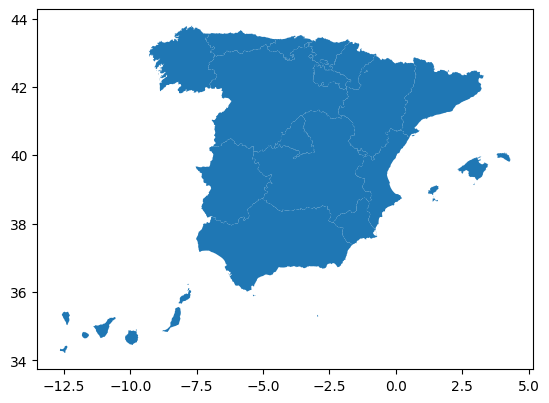

In [186]:
gdf.plot()

Las geometrías puede ser de tipo Punto, Líneas o polígonos espaciales (simple features). Cada figura espacial (**feature**, !!!ojo que en machine learning feature sería cada variable o característica,columna, correspondiente a cada unidad, a cada fila, pero aquí feature es un objeto espacial, una unidad de observación o una fila!!!! ).    
    
    ... como digo cada objeto, unidad o figura espacial puede estar compuesta por ejemplo por un único polígono, como el caso de Asturias

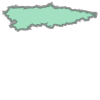

In [187]:
gdf["geometry"][2]


o como conjunto de polígonos o Multipolígonos, como el caso de las Islas Canarias

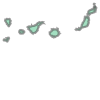

In [188]:
gdf["geometry"][4]

En este caso la cartografía venía vacía, sin metadatos, podemos ir añadiendo sólo algunas variables que podemos obtener de la propia geometría, como el área total de cada CCAA,o su centroide

In [189]:
gdf=gdf.to_crs(epsg=3857)
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [190]:
gdf["area"] = gdf.area/1000000 #en km^2

In [191]:
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area
0,CA01,CA01,CA01,"POLYGON ((-771500.967 4609161.53, -770971.944 ...",139322.480914
1,CA02,CA02,CA02,"POLYGON ((-80835.071 5299973.618, -81569.347 5...",85224.382633
2,CA03,CA03,CA03,"POLYGON ((-761301.206 5398710.47, -761359.585 ...",20024.713517
3,CA04,CA04,CA04,"MULTIPOLYGON (((157370.266 4683527.526, 157649...",8411.910867
4,CA05,CA05,CA05,"MULTIPOLYGON (((-1389154.238 4082146.153, -138...",11025.741418


Para el calculo del área es necesario tener bien definido el sistema de referencia, la proyección que se está utilizando para la localización de los diferentes elementos del mapa que estamos representando (los polígonos de las Comunidades Autónomas)
Es posible que os aparezca un warning referente a estas proyecciones utilizadas en las geometrías. En este caso yo he bajado los datos cartográficos del INE (EPSG:4258)

Para consultar características de cada sistema de referencia
[http://epsg.io]
[http://spatialreference.org]
CRS("epsg:3857") #PSeudomercator Este es el que usa Open Street Maps
http://spatialreference.org/ref/epsg/3857/
Projection used in many popular web mapping applications (Google/Bing/OpenStreetMap/etc). Sometimes known as EPSG:900913.
EPSG:4326 WGS 84

  

In [192]:
gdf.crs


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [193]:
# Podría fijar la cartografía en otro sistema de referencia:
# gdf=gdf.to_crs(epsg=3857) # este epsg=3857 Pseudo-Mercator -- Spherical Mercator es el que utilizan Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI

Calculo ahora el centroide de cada CCAA y lo guardo como otra columna adicional en mi datagrame

In [194]:
gdf['centroide'] = gdf.centroid

In [195]:
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area,centroide
0,CA01,CA01,CA01,"POLYGON ((-771500.967 4609161.53, -770971.944 ...",139322.480914,POINT (-509108.864 4504973.514)
1,CA02,CA02,CA02,"POLYGON ((-80835.071 5299973.618, -81569.347 5...",85224.382633,POINT (-73042.302 5091313.34)
2,CA03,CA03,CA03,"POLYGON ((-761301.206 5398710.47, -761359.585 ...",20024.713517,POINT (-667017.844 5356962.327)
3,CA04,CA04,CA04,"MULTIPOLYGON (((157370.266 4683527.526, 157649...",8411.910867,POINT (324652.022 4804751.347)
4,CA05,CA05,CA05,"MULTIPOLYGON (((-1389154.238 4082146.153, -138...",11025.741418,POINT (-1117246.717 4170758.888)


O podemos calcular la distancia a un punto (por ejemplo al centroide de Madrid CA13)

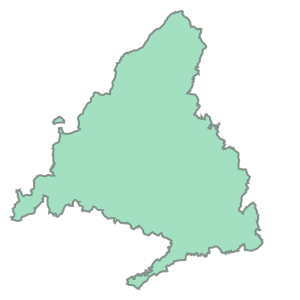

In [196]:
gdf["geometry"][12]

In [197]:
Madrid_point = gdf['centroide'].iloc[12]
gdf['distancia'] = gdf['centroide'].distance(Madrid_point)


In [198]:
gdf

,SP_ID,id,cod_CCAA,geometry,area,centroide,distancia
0,CA01,CA01,CA01,"POLYGON ((-771500.967 4609161.53, -770971.944 ...",139322.480914,POINT (-509108.864 4504973.514),4.440808e+05
1,CA02,CA02,CA02,"POLYGON ((-80835.071 5299973.618, -81569.347 5...",85224.382633,POINT (-73042.302 5091313.34),3.732504e+05
2,CA03,CA03,CA03,"POLYGON ((-761301.206 5398710.47, -761359.585 ...",20024.713517,POINT (-667017.844 5356962.327),4.890373e+05
3,CA04,CA04,CA04,"MULTIPOLYGON (((157370.266 4683527.526, 157649...",8411.910867,POINT (324652.022 4804751.347),7.503552e+05
4,CA05,CA05,CA05,"MULTIPOLYGON (((-1389154.238 4082146.153, -138...",11025.741418,POINT (-1117246.717 4170758.888),1.041506e+06
5,CA06,CA06,CA06,"MULTIPOLYGON (((-538758.874 5339814.352, -5383...",10018.908296,POINT (-448432.377 5342470.653),4.052912e+05
6,CA07,CA07,CA07,"MULTIPOLYGON (((-325991.36 5253264.525, -32597...",169498.180967,POINT (-532028.936 5126504.018),2.220188e+05
7,CA08,CA08,CA08,"MULTIPOLYGON (((-228246.188 5034302.35, -22779...",133985.359313,POINT (-334230.546 4807288.289),1.535271e+05
8,CA09,CA09,CA09,"MULTIPOLYGON (((73636.742 5265334.936, 74140.3...",57840.896613,POINT (170578.144 5131955.305),6.153748e+05
9,CA10,CA10,CA10,"MULTIPOLYGON (((57501.225 4942495.934, 57305.2...",39015.096807,POINT (-61425.599 4781157.47),3.858462e+05


### Podemos hacer gráficos de cloropletas estáticos (aquí los colores están en función del área)

<Axes: >

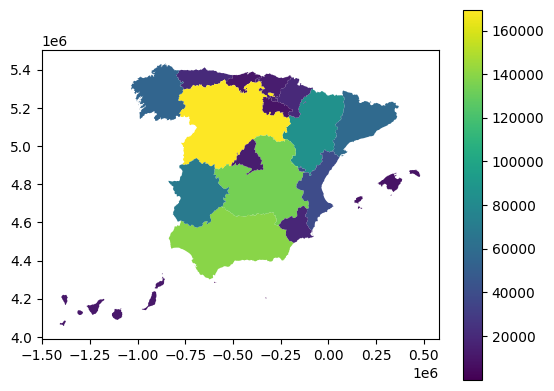

In [199]:
gdf.plot("area", legend=True)

Es muy importante la paleta de colores, que las tonalidades muestren claramente una relación entre intensidad y valores de las variables [Paletas de Colores en matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


<Axes: >

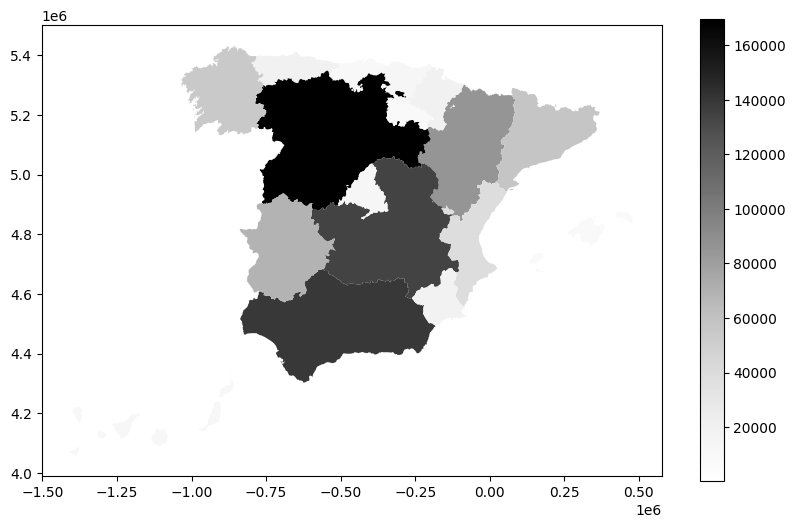

In [200]:
gdf.plot("area", legend=True, cmap='Greys', figsize=(10,6))

<Axes: >

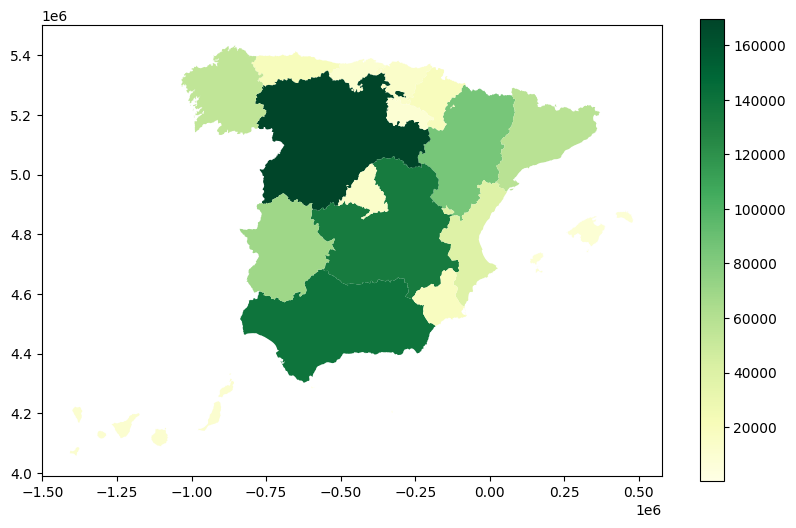

In [201]:
gdf.plot("area", legend=True, cmap='YlGn', figsize=(10,6))

In [202]:
# o dinámicos (requiere la librería `folium`, comprobar todos los métodos instalados en la versión de geopandas con print(dir(gpd)) debe estar 'explore'.
# Si no está este método 'explore' intalar la última versión conda install --channel conda-forge geopandas==0.12.2)
gdf.explore("area", legend=False)

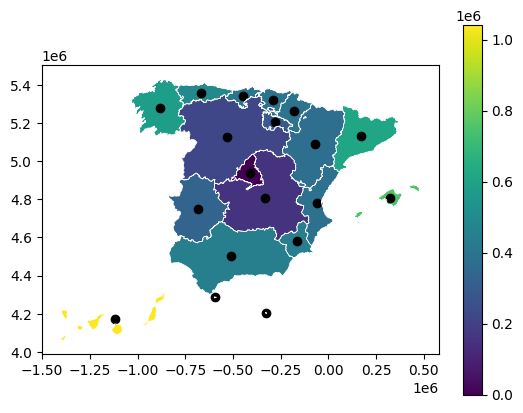

In [203]:
# podemos dibujar las fronteras y los centroides como si fueran capas

map=gdf.plot("distancia", legend=True)
map=gdf.boundary.plot(ax=map, color="white", linewidth=.5)
map=gdf["centroide"].plot(ax=map, color="black")

Podemos cambiar la paleta de colores   [Paletas de Colores en matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


<Axes: >

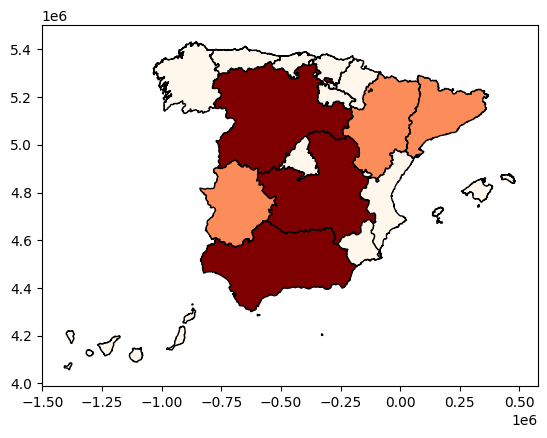

In [204]:
gdf.plot(column='area', scheme='equal_interval', k=3, cmap='OrRd', edgecolor='k') 

O podemos añadir a un gráfico estático también fondos de OpenstreetMap y de otras librerías 

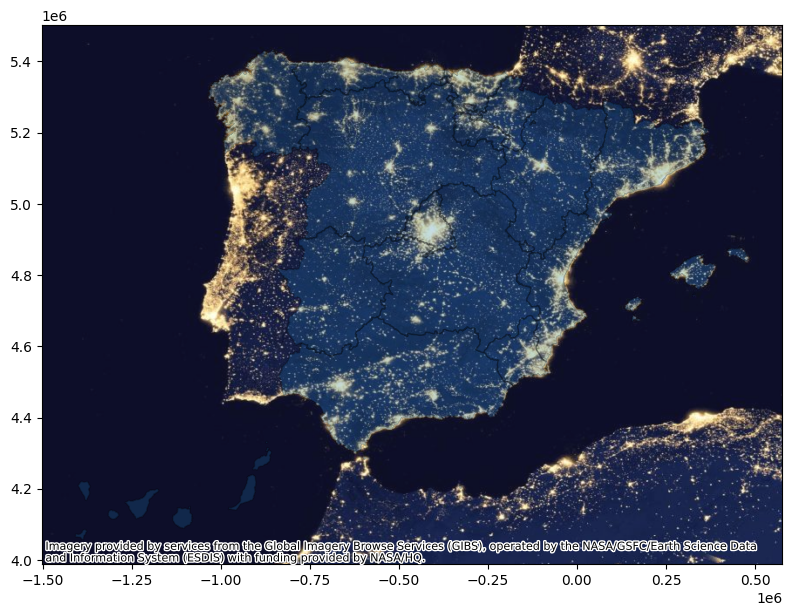

In [205]:
# pip install contextily desde el terminal si fuese necesario
import contextily as cx
import xyzservices.providers as xyz
# pasamos nuestro mapa al sistema Web Mercator (EPSG 3857)
gdf_wm = gdf.to_crs(epsg=3857)
map_c=gdf_wm.plot( edgecolor='k', figsize=(10,7), alpha=0.25)
# Ahora le añadimos una cartografía base
cx.add_basemap(map_c, source=xyz.NASAGIBS.ViirsEarthAtNight2012, alpha=0.95)
               
# Buscar diferentes proveedores de cartografías:  https://contextily.readthedocs.io/en/latest/providers_deepdive.html

#cx.add_basemap(map_c, source=xyz.CartoDB.Positron)
#cx.add_basemap(map_c, source=xyz.OpenStreetMap.HOT)
#cx.add_basemap(map_c, source=xyz.OpenTopoMap)


## Importar Metadatos a una Cartografías

Ahora vamos a añadirle datos a cada CCAA


In [206]:
# aquí estoy utilizando la librería Pandas as pd
salarios=pd.read_csv("datos/SALARIOS.csv",encoding='latin1',sep=";")
salarios.head()

,COD_CCAA,Nombre CCAA,SALARIO
0,CA01,Andalucía,12.40
1,CA02,Aragón,13.43
2,CA03,"Asturias, Principado de",14.24
3,CA04,"Balears, Illes",11.54
4,CA05,Canarias,11.88


In [207]:
# ahora fusionamos los datos de salarios a la cartografía
gdf=pd.merge(gdf, salarios,how='left', left_on='cod_CCAA', right_on='COD_CCAA')
gdf



,SP_ID,id,cod_CCAA,geometry,area,centroide,distancia,COD_CCAA,Nombre CCAA,SALARIO
0,CA01,CA01,CA01,"POLYGON ((-771500.967 4609161.53, -770971.944 ...",139322.480914,POINT (-509108.864 4504973.514),4.440808e+05,CA01,Andalucía,12.40
1,CA02,CA02,CA02,"POLYGON ((-80835.071 5299973.618, -81569.347 5...",85224.382633,POINT (-73042.302 5091313.34),3.732504e+05,CA02,Aragón,13.43
2,CA03,CA03,CA03,"POLYGON ((-761301.206 5398710.47, -761359.585 ...",20024.713517,POINT (-667017.844 5356962.327),4.890373e+05,CA03,"Asturias, Principado de",14.24
3,CA04,CA04,CA04,"MULTIPOLYGON (((157370.266 4683527.526, 157649...",8411.910867,POINT (324652.022 4804751.347),7.503552e+05,CA04,"Balears, Illes",11.54
4,CA05,CA05,CA05,"MULTIPOLYGON (((-1389154.238 4082146.153, -138...",11025.741418,POINT (-1117246.717 4170758.888),1.041506e+06,CA05,Canarias,11.88
5,CA06,CA06,CA06,"MULTIPOLYGON (((-538758.874 5339814.352, -5383...",10018.908296,POINT (-448432.377 5342470.653),4.052912e+05,CA06,Cantabria,12.95
6,CA07,CA07,CA07,"MULTIPOLYGON (((-325991.36 5253264.525, -32597...",169498.180967,POINT (-532028.936 5126504.018),2.220188e+05,CA07,Castilla y León,12.57
7,CA08,CA08,CA08,"MULTIPOLYGON (((-228246.188 5034302.35, -22779...",133985.359313,POINT (-334230.546 4807288.289),1.535271e+05,CA08,Castilla - La Mancha,12.60
8,CA09,CA09,CA09,"MULTIPOLYGON (((73636.742 5265334.936, 74140.3...",57840.896613,POINT (170578.144 5131955.305),6.153748e+05,CA09,Cataluña,15.40
9,CA10,CA10,CA10,"MULTIPOLYGON (((57501.225 4942495.934, 57305.2...",39015.096807,POINT (-61425.599 4781157.47),3.858462e+05,CA10,Comunitat Valenciana,12.83


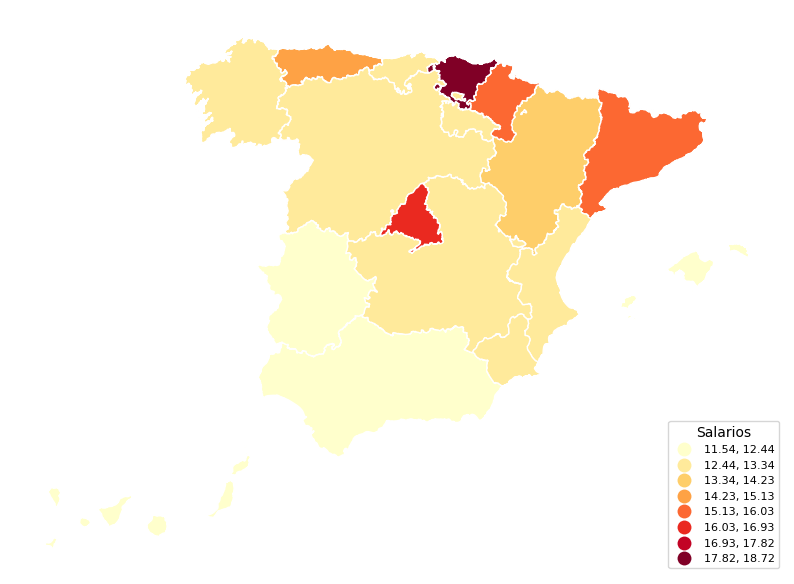

In [208]:
ax=gdf.plot(column='SALARIO', 
         scheme='EqualInterval',
         k=8, cmap='YlOrRd',
         edgecolor='w',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Salarios'} 
)
ax.set_axis_off()   

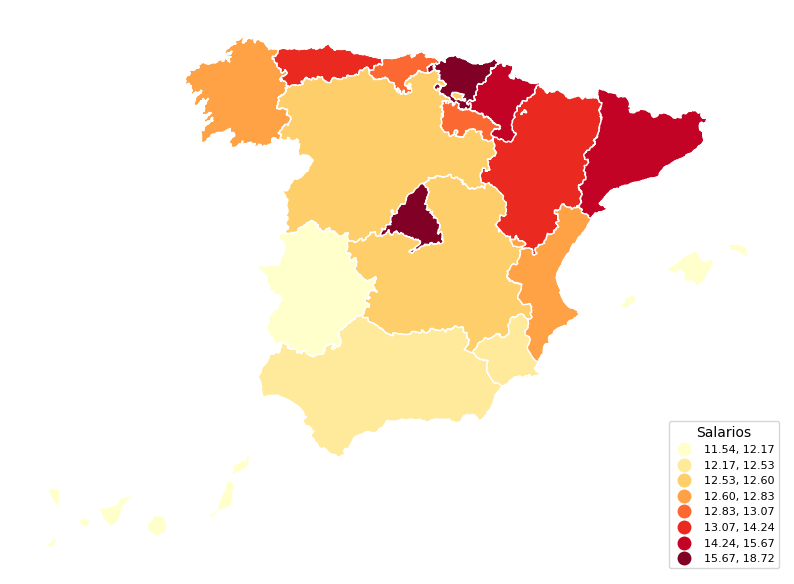

In [209]:

ax=gdf.plot(column='SALARIO', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         edgecolor='w',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Salarios'} 
)
ax.set_axis_off()       


Para terminar voy a **grabar** la cartografía con todos los campos para no tener que volver a cargarla.   

**Ojo que por ejemplo el formato ESRI 'shp' sólo permite una cartografía**

In [210]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SP_ID        19 non-null     object  
 1   id           19 non-null     object  
 2   cod_CCAA     19 non-null     object  
 3   geometry     19 non-null     geometry
 4   area         19 non-null     float64 
 5   centroide    19 non-null     geometry
 6   distancia    19 non-null     float64 
 7   COD_CCAA     17 non-null     object  
 8   Nombre CCAA  17 non-null     object  
 9   SALARIO      17 non-null     float64 
dtypes: float64(3), geometry(2), object(5)
memory usage: 1.6+ KB


Tengo que quitar una de las dos columans de cartografías

In [211]:
gdf["xlong"]=gdf['centroide'].x
gdf["ylat"]=gdf['centroide'].y
gdf=gdf.drop('centroide', axis=1)
gdf.head()

,SP_ID,id,cod_CCAA,geometry,area,distancia,COD_CCAA,Nombre CCAA,SALARIO,xlong,ylat
0,CA01,CA01,CA01,"POLYGON ((-771500.967 4609161.53, -770971.944 ...",139322.480914,4.440808e+05,CA01,Andalucía,12.40,-5.091089e+05,4.504974e+06
1,CA02,CA02,CA02,"POLYGON ((-80835.071 5299973.618, -81569.347 5...",85224.382633,3.732504e+05,CA02,Aragón,13.43,-7.304230e+04,5.091313e+06
2,CA03,CA03,CA03,"POLYGON ((-761301.206 5398710.47, -761359.585 ...",20024.713517,4.890373e+05,CA03,"Asturias, Principado de",14.24,-6.670178e+05,5.356962e+06
3,CA04,CA04,CA04,"MULTIPOLYGON (((157370.266 4683527.526, 157649...",8411.910867,7.503552e+05,CA04,"Balears, Illes",11.54,3.246520e+05,4.804751e+06
4,CA05,CA05,CA05,"MULTIPOLYGON (((-1389154.238 4082146.153, -138...",11025.741418,1.041506e+06,CA05,Canarias,11.88,-1.117247e+06,4.170759e+06


In [212]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SP_ID        19 non-null     object  
 1   id           19 non-null     object  
 2   cod_CCAA     19 non-null     object  
 3   geometry     19 non-null     geometry
 4   area         19 non-null     float64 
 5   distancia    19 non-null     float64 
 6   COD_CCAA     17 non-null     object  
 7   Nombre CCAA  17 non-null     object  
 8   SALARIO      17 non-null     float64 
 9   xlong        19 non-null     float64 
 10  ylat         19 non-null     float64 
dtypes: float64(5), geometry(1), object(5)
memory usage: 1.8+ KB


In [213]:
gdf.to_file('cartografias/CCAA_map.shp', encoding='latin1')

C:\Users\lrodr\AppData\Local\Temp\ipykernel_18344\3837298736.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('cartografias/CCAA_map.shp', encoding='latin1')
c:\Users\lrodr\OneDrive\Documentos\master_ucm\trabajos\9\entornoScoring\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'COD_CCAA' to 'COD_CCAA_1'
  ogr_write(
c:\Users\lrodr\OneDrive\Documentos\master_ucm\trabajos\9\entornoScoring\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Nombre CCAA' to 'Nombre CCA'
  ogr_write(


# Mapa de España

Ahora voy a hacer un mapa de España

In [214]:

gdfm =gpd.read_file("cartografias/Munic04_ESP.shp")
gdfm.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8108 entries, 0 to 8107
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SP_ID       8108 non-null   object  
 1   id          8108 non-null   object  
 2   cod_ine     8108 non-null   object  
 3   CODINE_MU   8108 non-null   object  
 4   CCAA        8108 non-null   object  
 5   COD_PROV    8108 non-null   object  
 6   PROV        8108 non-null   object  
 7   MUN         8108 non-null   object  
 8   POB_2016    8108 non-null   float64 
 9   POB_HO      8108 non-null   float64 
 10  POB_MU      8108 non-null   float64 
 11  PARO_TO     8108 non-null   float64 
 12  POB16_64    8108 non-null   float64 
 13  TASA_PARO   8108 non-null   float64 
 14  RENTPCAP07  8108 non-null   float64 
 15  PrecioIn16  8108 non-null   float64 
 16  geometry    8108 non-null   geometry
dtypes: float64(8), geometry(1), object(8)
memory usage: 1.1+ MB


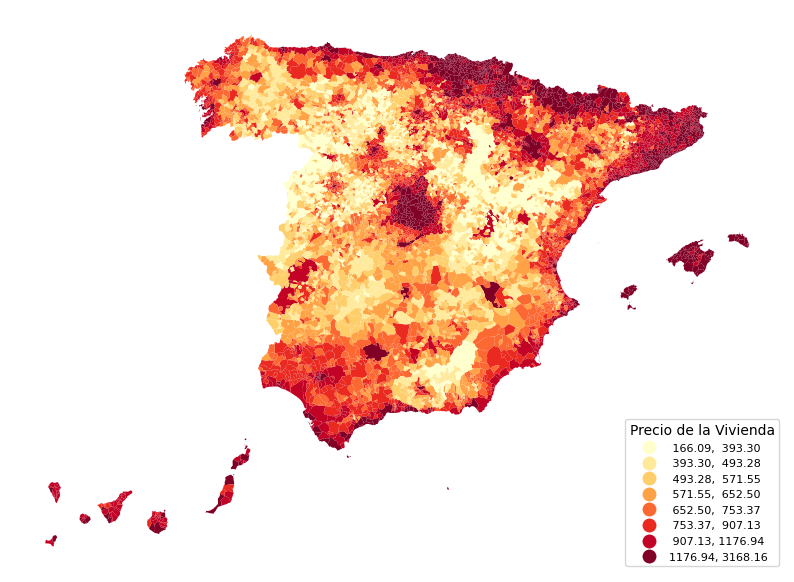

In [215]:
map=gdfm.plot(column='PrecioIn16', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Precio de la Vivienda'} 
)
map.set_axis_off()       


Puedo intentar ponerle encima cartografía de comunidades autónomas o provincias. Primero voy a crear la cartografía de las provincias agregando municipios (features) utilizando la función `dissolve()` de `GeoPandas`

<Axes: >

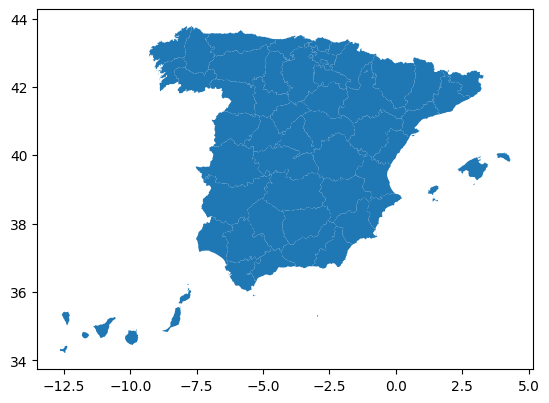

In [216]:
gprov=gdfm.dissolve(by="COD_PROV")
gprov.plot() 
   

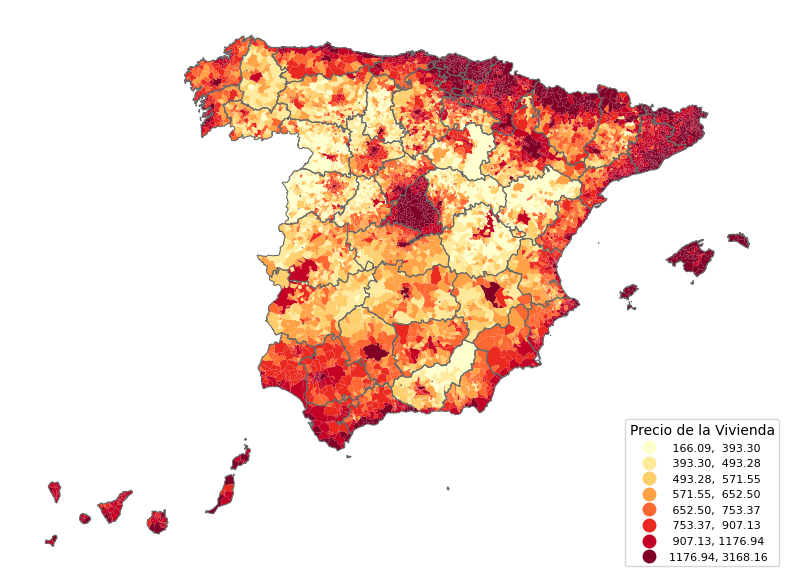

In [217]:
map=gdfm.plot(column='PrecioIn16', 
         scheme='quantiles',
         k=8, cmap='YlOrRd',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Precio de la Vivienda'} 
)
map=gprov.boundary.plot(ax=map,color="dimgray", linewidth=.75)
map.set_axis_off()  

## Extensiones

Hay un gran número de paquetes y de utilidades para trabajar con datos espaciales. Por ejemplo:
- para poder representar puntos en un mapa es necesario tner la geolocalizaciópn de los puntos utilizando por ejemplo las direcciones postales. La función de `GeoPandas` **`tools.geocode()`** sirve para geolocalizar direcciones. También la librería **`geocoder`** hace lo mismo     
    
- La librería **`contextily`** sirve para añadir mapas contextuales OpenStreetMap a los gráficos de `GeoPandas`

- La librería **`osmnx`** sirve para interactuar con la api de Openstreetmap

- La librería **`Folium`** sirve para crear mapas web con Leaflet

- La librería **`Shapely`** para gestionar cartografías

